In [2]:
import json
with open("entities.json", "r") as f:
    data = json.load(f)

In [5]:
import re

def read_wnut(data):
    token_docs = [] 
    tag_docs = []
    token_keys = ['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']
    for image in data.keys():
        text = data[image]

        raw_docs = re.split(r'\n\t?\n', text)
        
        print(raw_docs)
    
        for doc in raw_docs:
            tokens = []
            tags = []
            previous_line = ''
            for line in doc.split('\n'):
                for word in split_text_at_space_before_tokens(line, token_keys):
                    if word == '':
                        continue
                     
                    if word[1:] =='idem':
                        if previous_line == '':
                            continue
                        old_word = word
                        word=word[0]+replace_idem(word,previous_line)
                        line = line.replace(old_word,word)

                    tag, token = word[0], word[1:]
                    if tag not in token_keys:
                        continue
                    tokens.append(token)
                    tags.append(tag)
                previous_line=line
            token_docs.append(tokens)
            tag_docs.append(tags)

    return token_docs, tag_docs

texts, tags = read_wnut(data)

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise\nⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise\nⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise\nⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise\nⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise\nⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise\nⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise\nⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise\nⓅde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise\nⓄde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise\nⓄde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise\nⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise\nⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise\nⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme 

In [6]:
def replace_idem(word,previous_line):
    words = previous_line.split(' ')
    key = word[0]
    for w in words:
        if w[0]==key:
            
            return w[1:]

    return 'idem'

def split_text_at_space_before_tokens(text, token_keys):
    # Create a regex pattern to find a space that is immediately followed by any token
    # The (?=...) syntax is a positive look-ahead assertion that checks for a token following a space without including it in the match
    pattern = f" (?={'|'.join(re.escape(key) for key in token_keys)})"
    
    # Split the text using the regex pattern
    segments = re.split(pattern, text)
    
    return segments


In [7]:
print(texts[0][10:17], tags[0][10:17], sep='\n')


['Garçon', 'Piémontaise', 'Machol', 'Pierre', 'vitrier', '24', 'Garçon']
['Ⓒ', 'Ⓚ', 'Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ']


In [11]:
import yaml

with open('tokens.yml') as f:
    tokens = yaml.load(f, Loader=yaml.FullLoader)


def get_labels(tokens):
    labels = {}
    for token in tokens:
        labels[tokens[token]['start']] = token
    return labels

label2literal = get_labels(tokens)
mots=0

token_dict = {}

for i in range(1218):
    mots+=len(texts[i])

    for j in range(len(tags[i])):
        tag = label2literal[tags[i][j]]
        if tag in token_dict.keys():
            token_dict[tag]+=1
        else:
            token_dict[tag]=1
print(mots)

147156


In [12]:
print(token_dict)

{'surname': 19157, 'firstname': 24931, 'occupation': 16159, 'age': 16436, 'civil_status': 10705, 'nationality': 13310, 'surname_household': 5639, 'link': 20734, 'birth_date': 7344, 'lob': 9232, 'employer': 2907, 'observation': 602}


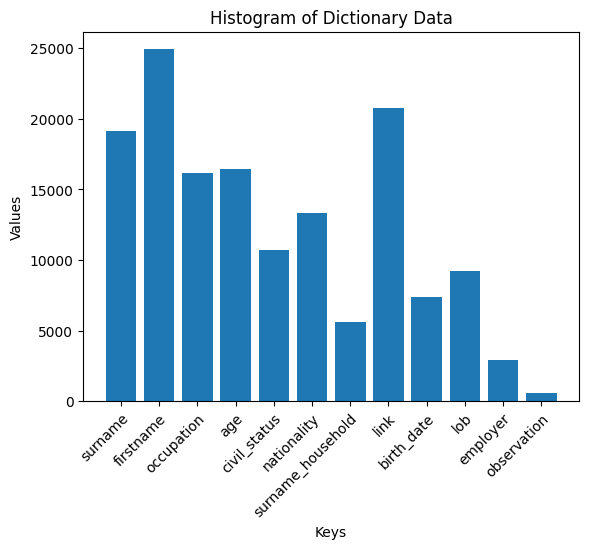

In [14]:
import matplotlib.pyplot as plt

data = {'surname': 19157, 'firstname': 24931, 'occupation': 16159, 'age': 16436, 'civil_status': 10705, 'nationality': 13310, 'surname_household': 5639, 'link': 20734, 'birth_date': 7344, 'job': 9232, 'employer': 2907, 'observation': 602}

keys = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()

ax.bar(keys, values)

plt.xticks(range(len(keys)), keys, rotation=45, ha='right', rotation_mode='anchor')

plt.title('Histogram of Dictionary Data')
plt.xlabel('Keys')
plt.ylabel('Values')

plt.show()

1218

In [8]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_tags, val_tags = train_test_split(texts, tags, test_size=.2)

In [17]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [40]:
# On fait un vote a majorité 

dict_text_tag = {}
for i in range(len(tags)-480):
    for j in range(len(tags[i])):
        if texts[i][j] not in dict_text_tag.keys():
            dict_text_tag[texts[i][j]] = []
        dict_text_tag[texts[i][j]].append(tags[i][j])

for key in dict_text_tag.keys():
    dict_text_tag[key] = max(set(dict_text_tag[key]), key = dict_text_tag[key].count)


In [41]:

errors = 0
total = 0
unseen = 0

error_dict = {}
unseen_dict = {}

for i in range(len(tags)-480, len(tags)):
    for j in range(len(tags[i])):
        tag = label2literal[tags[i][j]]
        
        if texts[i][j] in dict_text_tag:
            if dict_text_tag[texts[i][j]] != tags[i][j]:
                errors += 1
                if tag in error_dict.keys():
                    error_dict[tag]+=1
                else:
                    error_dict[tag]=1
        else:
            if tag in unseen_dict.keys():
                unseen_dict[tag]+=1
            else:
                unseen_dict[tag]=1
            unseen += 1
        total += 1

print(errors,unseen, total, (unseen + errors)/total)


2383 9575 53141 0.22502399277394103


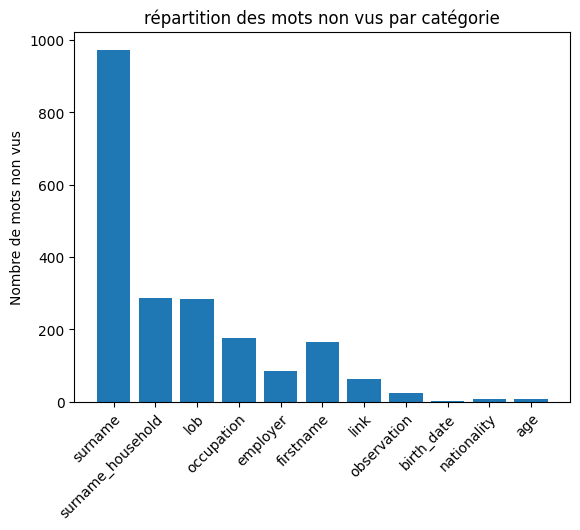

In [31]:
data = unseen_dict
keys = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()

ax.bar(keys, values)

plt.xticks(range(len(keys)), keys, rotation=45, ha='right', rotation_mode='anchor')

plt.title('répartition des mots non vus par catégorie')
plt.xlabel('')
plt.ylabel('Nombre de mots non vus')

plt.show()

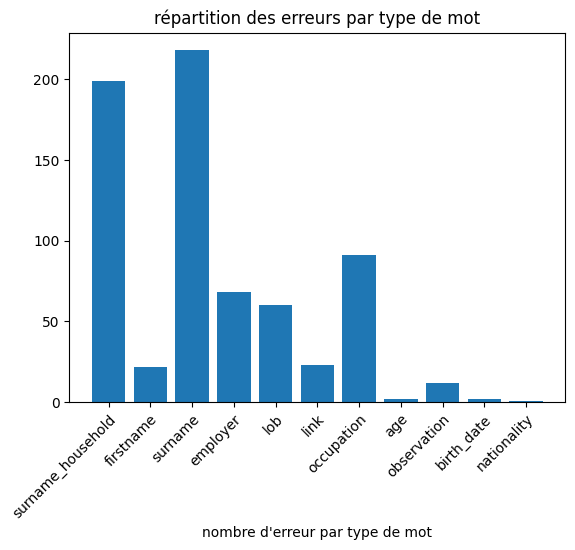

In [32]:
data = error_dict

keys = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()

ax.bar(keys, values)

plt.xticks(range(len(keys)), keys, rotation=45, ha='right', rotation_mode='anchor')

plt.title('répartition des erreurs par type de mot')
plt.xlabel("nombre d'erreur par type de mot")
plt.ylabel('')

plt.show()


In [15]:
print(len(tags))

1218
